In [76]:
import pandas as pd
import numpy as np
import datetime
import random 
import hts
from hts.hierarchy import HierarchyTree

from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric

import matplotlib.pyplot as plt
import seaborn as sns
from imp import reload


import warnings
warnings.simplefilter("ignore")

# settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

In [84]:
import forecasting.store_item_demand as sid
import forecasting.bplot as bplot

In [3]:
reload(sid);

# Load and Preprocess

In [4]:
df, df_h, hierarchy = sid.preprocess_data('../data/train.csv')


# no null entries
# 10 stores
# 50 items
# 50*10=500 separate time series, one for each store/item combination
# 1826 days = 5 years
# 1826*500 = 913'000 rows of sales data
    
Number of time series at the bottom level: 500
Number of time series at the middle level: 10
Number of time series at the top level   : 1


## First look at the data

In [5]:
#HierarchyTree.from_nodes(hierarchy, h_df, root='total')

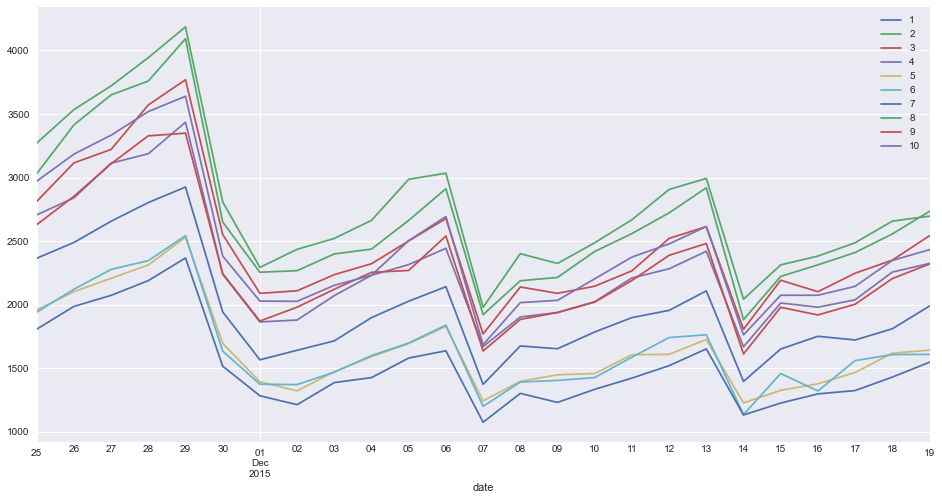

In [6]:
df_h['2015-11-25':'2015-12-19'][hierarchy['total']].plot()

In [435]:
#df_h[hierarchy['total']].plot()

# Testing Prophet

In [8]:
df_prophet = df_h['1'].to_frame().reset_index()
df_prophet.columns = ['ds', 'y']

In [9]:
df_prophet.head()

,ds,y
0,2013-01-01,1316
1,2013-01-02,1264
2,2013-01-03,1305
3,2013-01-04,1452
4,2013-01-05,1499


In [10]:
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

In [11]:
m.fit(df_prophet)

In [12]:
future = m.make_future_dataframe(periods=90)

In [13]:
df_forecast = m.predict(future)

In [14]:
df_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,2036.462099,1019.366670,1324.698527,2036.462099,2036.462099,-860.506591,-860.506591,-860.506591,-183.840590,-183.840590,-183.840590,-676.666001,-676.666001,-676.666001,0.0,0.0,0.0,1175.955508
1,2013-01-02,2035.462306,1040.137875,1328.914195,2035.462306,2035.462306,-849.310296,-849.310296,-849.310296,-170.288343,-170.288343,-170.288343,-679.021953,-679.021953,-679.021953,0.0,0.0,0.0,1186.152010
2,2013-01-03,2034.462512,1177.199758,1471.889327,2034.462512,2034.462512,-707.979441,-707.979441,-707.979441,-26.042308,-26.042308,-26.042308,-681.937133,-681.937133,-681.937133,0.0,0.0,0.0,1326.483071
3,2013-01-04,2033.462718,1328.964750,1627.004667,2033.462718,2033.462718,-556.231969,-556.231969,-556.231969,129.082069,129.082069,129.082069,-685.314038,-685.314038,-685.314038,0.0,0.0,0.0,1477.230749
4,2013-01-05,2032.462925,1491.702445,1783.379017,2032.462925,2032.462925,-395.952477,-395.952477,-395.952477,293.086444,293.086444,293.086444,-689.038921,-689.038921,-689.038921,0.0,0.0,0.0,1636.510447


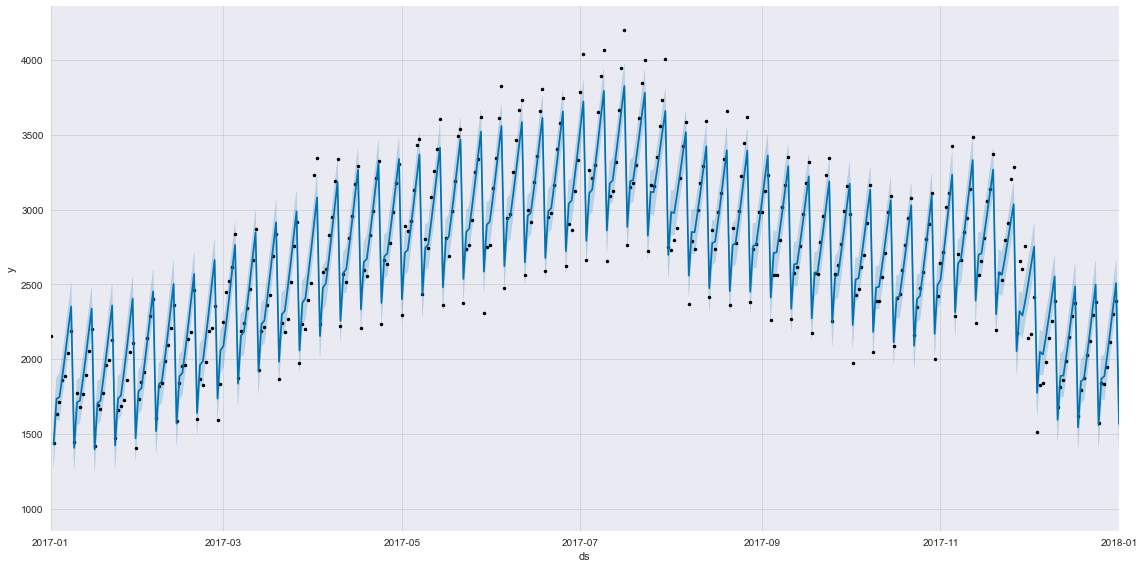

In [54]:
fig, ax = plt.subplots()
ax.set_xlim([datetime.date(2017, 1, 1), datetime.date(2018, 1, 1)])
fig1 = m.plot(df_forcast_small, ax)

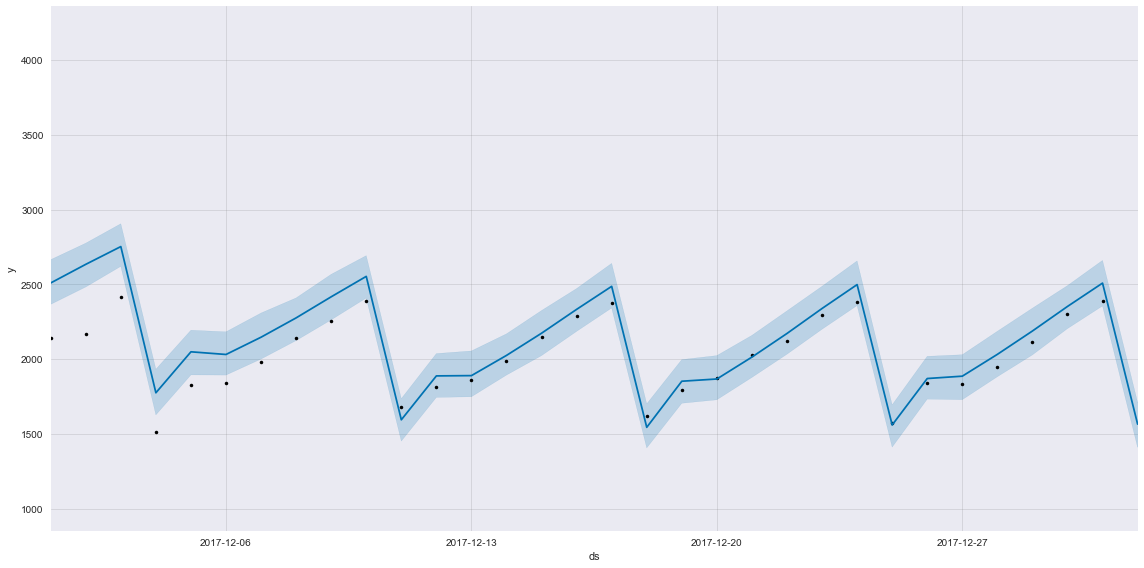

In [55]:
fig, ax = plt.subplots()
ax.set_xlim([datetime.date(2017, 12, 1), datetime.date(2018, 1, 1)])
fig1 = m.plot(df_forcast_small, ax)

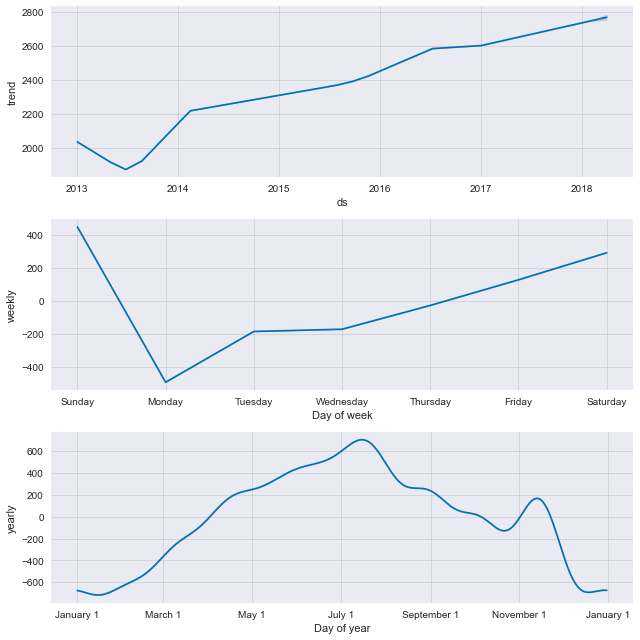

In [57]:
fig2 = m.plot_components(df_forecast)

In [434]:
#plot_plotly(m, df_forecast)

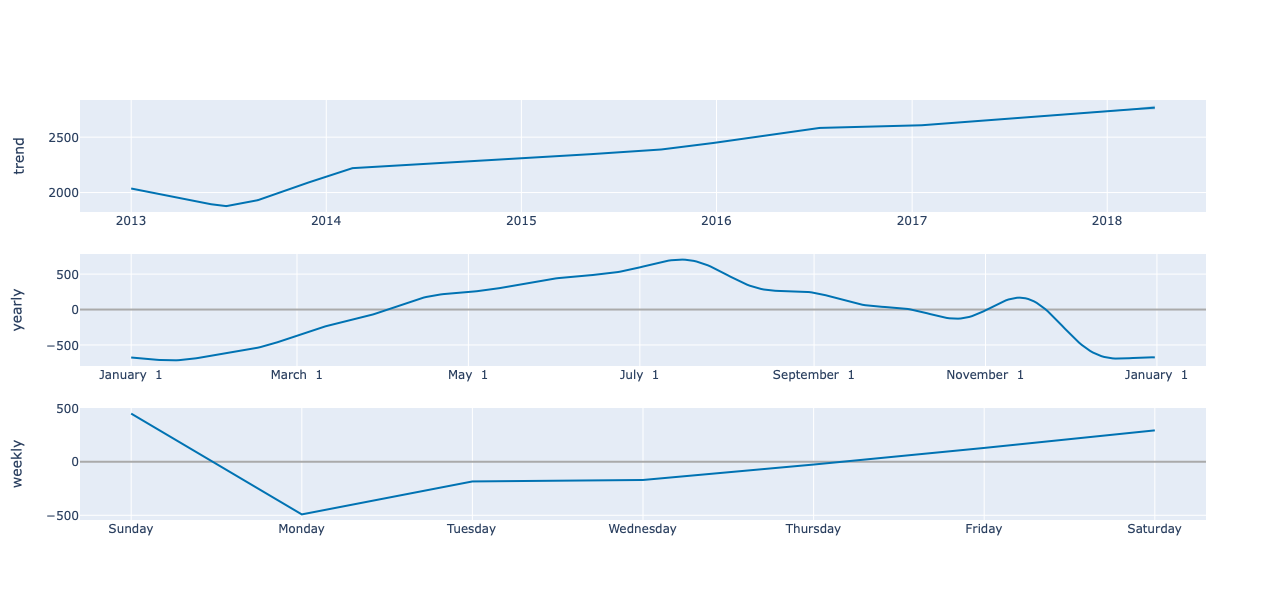

In [60]:
plot_components_plotly(m, df_forecast)

In [166]:
df_p = performance_metrics(df_cv)
df_p['horizon'] = df_p['horizon'].apply(lambda x: int(str(x).split()[0]))

In [168]:
df_p.set_index('horizon', inplace=True)

In [169]:
trace = df_p['smape']*100.

In [170]:
reload(bplot);

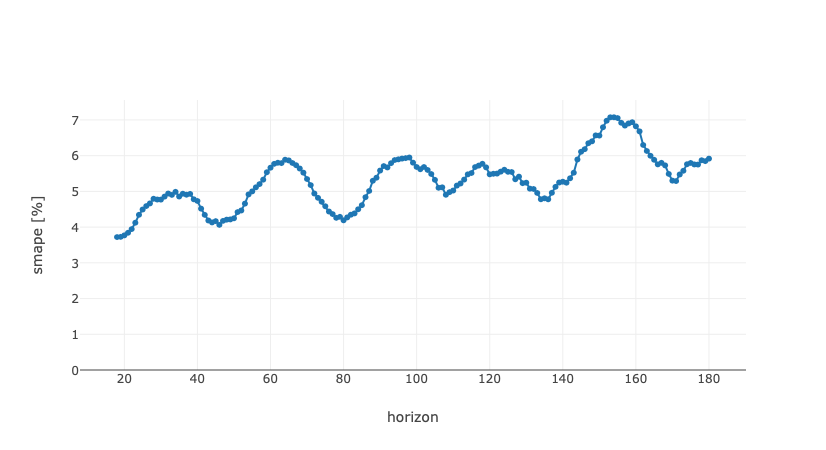

In [171]:
bplot.plot_timeseries([trace], labels=['smape'], xlabel='horizon', ylabel='smape [%]')

# Cross-validation

In [404]:
reload(sid);

## Store-level predictions

In [405]:
stores = hierarchy['total']
store_cvs, store_perfs = sid.cv_loop(df_h, ts_list=stores, progress_bar=False)

INFO:prophet:Making 7 forecasts with cutoffs between 2016-01-11 00:00:00 and 2017-07-04 00:00:00
INFO:prophet:Making 7 forecasts with cutoffs between 2016-01-11 00:00:00 and 2017-07-04 00:00:00
INFO:prophet:Making 7 forecasts with cutoffs between 2016-01-11 00:00:00 and 2017-07-04 00:00:00
INFO:prophet:Making 7 forecasts with cutoffs between 2016-01-11 00:00:00 and 2017-07-04 00:00:00
INFO:prophet:Making 7 forecasts with cutoffs between 2016-01-11 00:00:00 and 2017-07-04 00:00:00
INFO:prophet:Making 7 forecasts with cutoffs between 2016-01-11 00:00:00 and 2017-07-04 00:00:00
INFO:prophet:Making 7 forecasts with cutoffs between 2016-01-11 00:00:00 and 2017-07-04 00:00:00
INFO:prophet:Making 7 forecasts with cutoffs between 2016-01-11 00:00:00 and 2017-07-04 00:00:00
INFO:prophet:Making 7 forecasts with cutoffs between 2016-01-11 00:00:00 and 2017-07-04 00:00:00
INFO:prophet:Making 7 forecasts with cutoffs between 2016-01-11 00:00:00 and 2017-07-04 00:00:00


In [406]:
reload(sid);

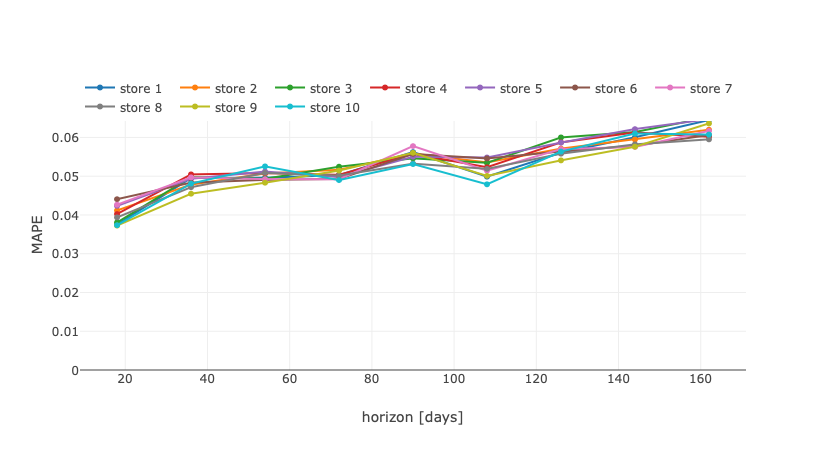

In [407]:
sid.cv_plot(store_perfs)

## Item-level predictions

In [429]:
stores = hierarchy['total']

In [431]:
stores_sample = random.sample(stores, 3)

['5_23', '5_8', '5_27', '5_14', '5_12']


INFO:prophet:Making 7 forecasts with cutoffs between 2016-01-11 00:00:00 and 2017-07-04 00:00:00
INFO:prophet:Making 7 forecasts with cutoffs between 2016-01-11 00:00:00 and 2017-07-04 00:00:00
INFO:prophet:Making 7 forecasts with cutoffs between 2016-01-11 00:00:00 and 2017-07-04 00:00:00
INFO:prophet:Making 7 forecasts with cutoffs between 2016-01-11 00:00:00 and 2017-07-04 00:00:00
INFO:prophet:Making 7 forecasts with cutoffs between 2016-01-11 00:00:00 and 2017-07-04 00:00:00


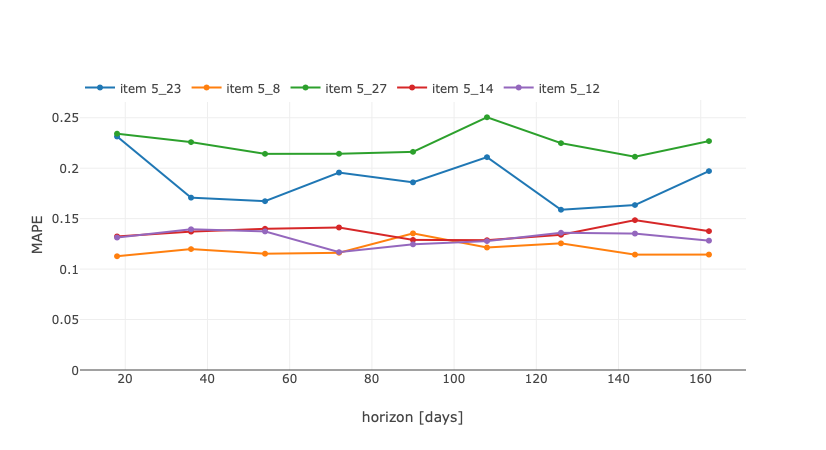

['7_13', '7_31', '7_16', '7_7', '7_43']


INFO:prophet:Making 7 forecasts with cutoffs between 2016-01-11 00:00:00 and 2017-07-04 00:00:00
INFO:prophet:Making 7 forecasts with cutoffs between 2016-01-11 00:00:00 and 2017-07-04 00:00:00
INFO:prophet:Making 7 forecasts with cutoffs between 2016-01-11 00:00:00 and 2017-07-04 00:00:00
INFO:prophet:Making 7 forecasts with cutoffs between 2016-01-11 00:00:00 and 2017-07-04 00:00:00
INFO:prophet:Making 7 forecasts with cutoffs between 2016-01-11 00:00:00 and 2017-07-04 00:00:00


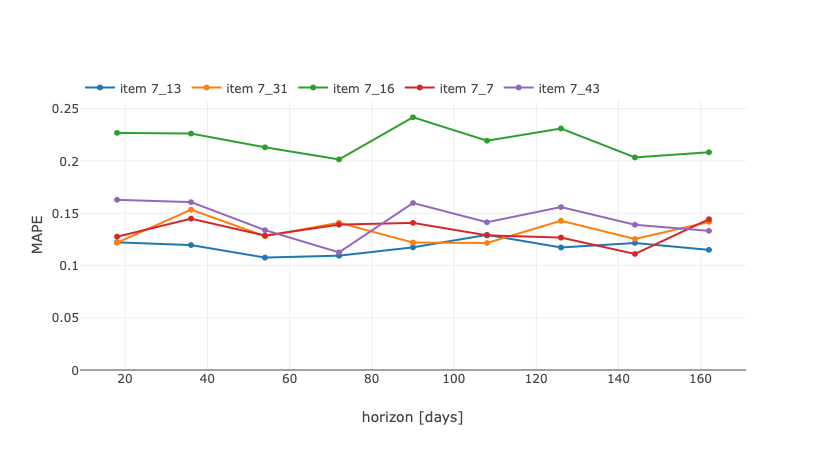

['10_12', '10_10', '10_41', '10_40', '10_14']


INFO:prophet:Making 7 forecasts with cutoffs between 2016-01-11 00:00:00 and 2017-07-04 00:00:00
INFO:prophet:Making 7 forecasts with cutoffs between 2016-01-11 00:00:00 and 2017-07-04 00:00:00
INFO:prophet:Making 7 forecasts with cutoffs between 2016-01-11 00:00:00 and 2017-07-04 00:00:00
INFO:prophet:Making 7 forecasts with cutoffs between 2016-01-11 00:00:00 and 2017-07-04 00:00:00
INFO:prophet:Making 7 forecasts with cutoffs between 2016-01-11 00:00:00 and 2017-07-04 00:00:00


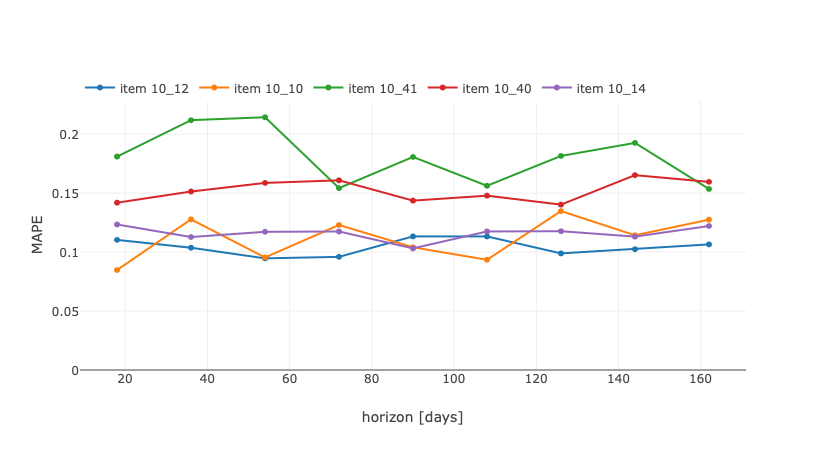

In [433]:
for s in stores_sample:
    items = hierarchy[s]
    items_sample = random.sample(items, 5)
    print(items_sample)
    item_cvs, item_perfs = sid.cv_loop(df_h, ts_list=items_sample, progress_bar=False)
    sid.cv_plot(item_perfs, id_label='item')